In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import dates
from matplotlib.colors import LogNorm
from netCDF4 import num2date,date2num,Dataset
import matplotlib._pylab_helpers
#from joblib import Parallel, delayed
import scipy.interpolate as interpolate
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats.mstats import scoreatpercentile
import pyart
import os,subprocess,time,copy
import scipy
import math
import matplotlib.gridspec as gridspec
import cPickle as pickle
#import pickle
import pprint
import pyproj
import pandas as pd
import scipy.interpolate as interpolate
import sharppy.sharptab as tab
from marcus_py_tools import make_edge_vec, xy_from_latlon, latlon_from_xy, walklevel, find_stuff_at_level
%matplotlib inline

###Load Data

In [4]:
filenm = '/mnt/raid/afridlin/data/mc3e/citation-mcfarquhar/mc3e.illinois_microphysics.110520_V3withArea.cdf'
nc     = Dataset(filenm,'r')
timm   = nc.variables['time'][:]      #..HHMMSS
d_le   = nc.variables['bin_min'][:]   #..In microns
d_re   = nc.variables['bin_max'][:]   #..In microns
d_mid  = nc.variables['bin_mid'][:]   #..In microns
dD     = nc.variables['bin_dD'][:]/(1.e4)  #..1/um -> 1/cm
dN_dD  = nc.variables['numdist'][:,:]   #..1/cm4
dM_dD  = nc.variables['massdist'][:,:]  #..g/cm4
dM_dD_a = nc.variables['massdist_BL'][:,:] #..Using Baker and Lawson
dA_dD  = nc.variables['areadist'][:,:]  #..cm2/cm4
nc.close()

#..Get dimension length
num_tim = timm.shape[0]   #..Number of times
num_bin = d_mid.shape[0]   #..Number of particle bins

#..Convert time to hour-of-day (UTC)
time   = []
for i in range(num_tim):
    timst = str(timm[i])
    time  = np.r_[time,float(timst[:2]) + float(timst[2:4])/60. + float(timst[4:])/3600.]
#..

###Calculate area of sphere (area_sphere) and average particle area (area_part)
- area_sphere is given by geometrical area swept out by sphere with diameter d_mid
- area_part is given by dividing the area concentration by the number concentration
- area_ratio is (area_part/area_sphere)

In [6]:
d_mid_cm    = d_mid/1.e4     #..um -> cm
area_sphere = np.pi*(d_mid_cm/2.)**2
#..
area_part = dA_dD/dN_dD      #..cm2
#..
area_ratio = np.ones_like(area_part)
for i in range(num_tim):
    area_ratio[i,:] = area_part[i,:]/area_sphere[:]
#..

###Plot area ratio

<matplotlib.colorbar.Colorbar instance at 0x7fc0fc1f75f0>

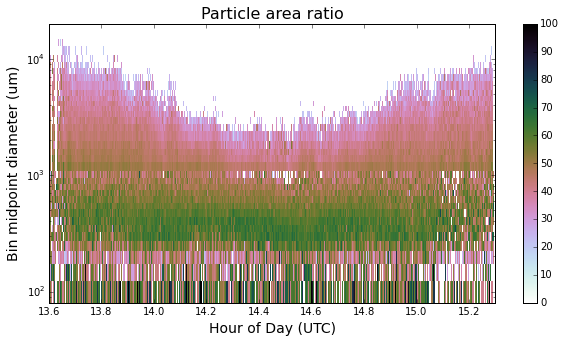

In [15]:
#..
t_start=13.6
t_end=15.3
#..
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(111)
plt.pcolormesh(time,d_mid,area_ratio.T,vmin=0.,vmax=100.,cmap=cm.cubehelix_r)
plt.yscale('log')
ax.set_xlim(t_start,t_end)
ax.set_ylim(80.,20000.)
plt.title('Particle area ratio',fontsize=16)
ax.set_xlabel('Hour of Day (UTC)',fontsize=14)
ax.set_ylabel('Bin midpoint diameter (um)',fontsize=14)
plt.colorbar()